In [1]:
import numpy as np
# Define two input signals
x = [1, 2, 3, 4]
h = [1, 0, -1]
# Perform linear convolution using numpy
linear_conv = np.convolve(x, h)
print("Linear Convolution: ", linear_conv) 

Linear Convolution:  [ 1  2  2  2 -3 -4]


In [5]:
import numpy as np

# Define two input signals
x = [1, 2, 3, 4]
h = [1, 0, -1]

# Determine the length for circular convolution
N = max(len(x), len(h))
# Zero-pad the shorter sequence to match the length of the longer one
x_padded = np.pad(x, (0, N - len(x)), mode='constant')
h_padded = np.pad(h, (0, N - len(h)), mode='constant')
# Perform circular convolution using FFT
X_fft = np.fft.fft(x_padded)
H_fft = np.fft.fft(h_padded)
circular_conv = np.fft.ifft(X_fft * H_fft)
# Only the real part is considered (since the imaginary part should be zero)
circular_conv = np.real(circular_conv)
print("Circular Convolution: ", circular_conv)


Circular Convolution:  [-2. -2.  2.  2.]


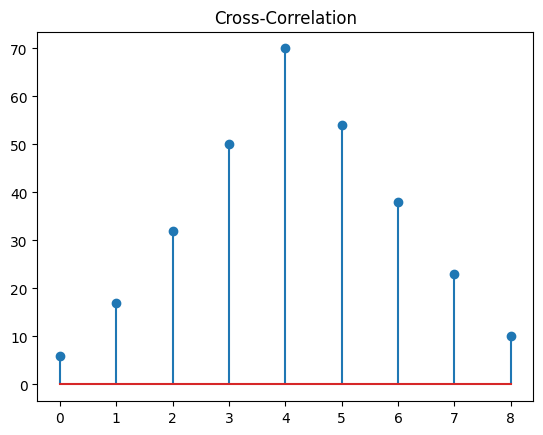

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define two signals
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 4, 5, 6])

# Perform cross-correlation using numpy
cross_corr = np.correlate(x, y, mode='full')

# Plot cross-correlation
plt.stem(cross_corr)
plt.title('Cross-Correlation')
plt.show()

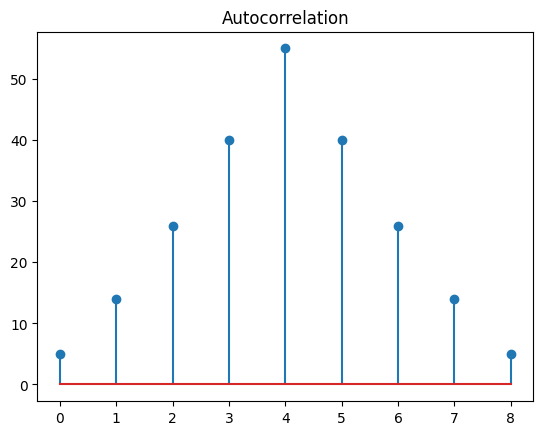

In [7]:
# Define a signal
x = np.array([1, 2, 3, 4, 5])
# Perform autocorrelation using numpy
auto_corr = np.correlate(x, x, mode='full')
# Plot autocorrelation
plt.stem(auto_corr)
plt.title('Autocorrelation')
plt.show()

C:\Users\Meet\AppData\Local\Temp\ipykernel_4944\3880093116.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data = wavfile.read('audio_file.wav')


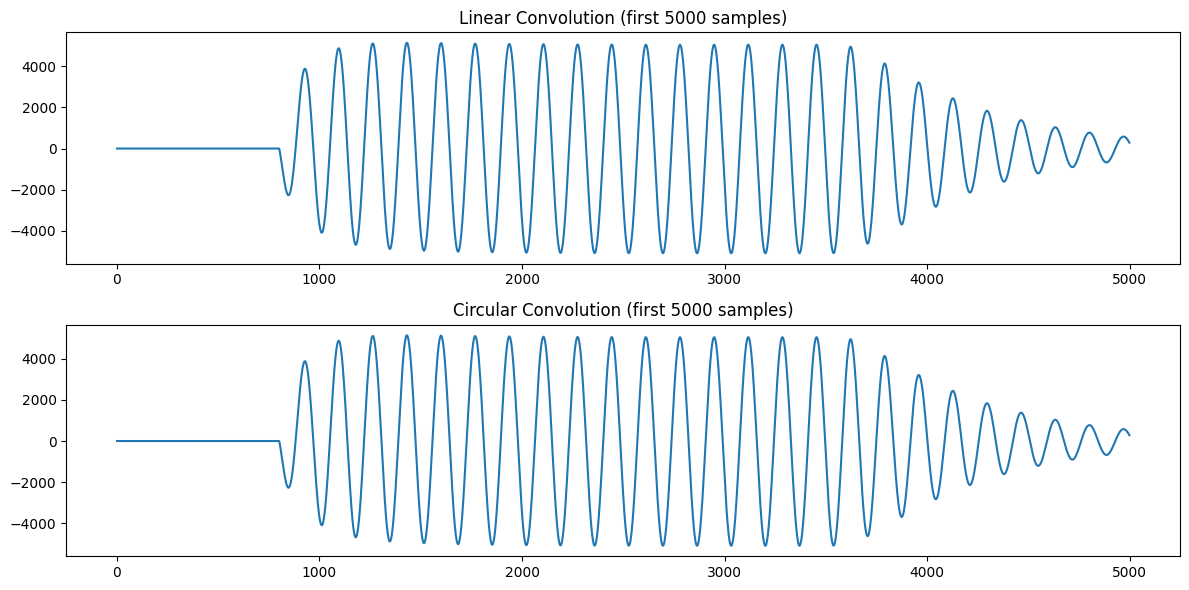

In [11]:
# Use Python to create a script that performs both linear and circular convolution on an audio file with an impulse response. Compare and visualize the results.
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
# Load the audio file
sample_rate, audio_data = wavfile.read('audio_file.wav')

# Convert stereo to mono if necessary (np.convolve and FFT expect 1-D signals)
if audio_data.ndim > 1:
	# Average channels to mono (preserves shape as 1-D)
	audio = audio_data.mean(axis=1)
else:
	audio = audio_data

# ensure floating point for convolution/FFT
audio = audio.astype(np.float32)

# Define the impulse response (for example, a simple low-pass filter)
impulse_response = np.array([0.2, 0.5, 0.2], dtype=np.float32)

# Perform linear convolution (length = len(audio) + len(impulse) - 1)
linear_conv = np.convolve(audio, impulse_response, mode='full')

# Perform circular convolution
# choose circular length N >= len(impulse). Common choice is N = len(audio) to get circular conv over the original signal length
N = max(len(audio), len(impulse_response))
audio_padded = np.pad(audio, (0, N - len(audio)), mode='constant')
impulse_padded = np.pad(impulse_response, (0, N - len(impulse_response)), mode='constant')
circular_conv = np.fft.ifft(np.fft.fft(audio_padded, n=N) * np.fft.fft(impulse_padded, n=N)).real

# Plot the results (plot a limited number of samples for long signals)
max_plot_samples = 5000
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(linear_conv[:max_plot_samples])
plt.title('Linear Convolution (first {} samples)'.format(max_plot_samples))
plt.subplot(2, 1, 2)
plt.plot(circular_conv[:max_plot_samples])
plt.title('Circular Convolution (first {} samples)'.format(max_plot_samples))
plt.tight_layout()
plt.show()

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# --- Load Audio Files ---
fs_clean, clean = wavfile.read('audio_file.wav')
fs_noisy, noisy = wavfile.read('noisy_audio.wav')
fs_periodic, periodic = wavfile.read('noisy_audio.wav')

# Convert to mono if stereo
if clean.ndim > 1:
    clean = clean.mean(axis=1)
if noisy.ndim > 1:
    noisy = noisy.mean(axis=1)
if periodic.ndim > 1:
    periodic = periodic.mean(axis=1)

# --- Normalize ---
clean = clean / np.max(np.abs(clean))
noisy = noisy / np.max(np.abs(noisy))
periodic = periodic / np.max(np.abs(periodic))

# --- Autocorrelation Function ---
def autocorrelation(x):
    corr = np.correlate(x, x, mode='full')
    corr = corr[corr.size // 2:]  # keep only positive lags
    return corr / np.max(corr)

# --- Cross-correlation Function ---
def cross_correlation(x, y):
    corr = np.correlate(x, y, mode='full')
    return corr / np.max(corr)

# Compute correlations
auto_clean = autocorrelation(clean)
auto_noisy = autocorrelation(noisy)
auto_periodic = autocorrelation(periodic)

cross_clean_noisy = cross_correlation(clean, noisy)
cross_clean_periodic = cross_correlation(clean, periodic)

# --- Plot Autocorrelation Results ---
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(auto_clean)
plt.title('Autocorrelation - Clean Audio')
plt.xlabel('Lag')
plt.ylabel('Correlation')

plt.subplot(3, 1, 2)
plt.plot(auto_noisy)
plt.title('Autocorrelation - Noisy Audio')
plt.xlabel('Lag')
plt.ylabel('Correlation')

plt.subplot(3, 1, 3)
plt.plot(auto_periodic)
plt.title('Autocorrelation - Periodic Audio')
plt.xlabel('Lag')
plt.ylabel('Correlation')

plt.tight_layout()
plt.show()

# --- Plot Cross-correlation Results ---
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(cross_clean_noisy)
plt.title('Cross-correlation: Clean vs Noisy Audio')
plt.xlabel('Lag')
plt.ylabel('Correlation')

plt.subplot(2, 1, 2)
plt.plot(cross_clean_periodic)
plt.title('Cross-correlation: Clean vs Periodic Audio')
plt.xlabel('Lag')
plt.ylabel('Correlation')

plt.tight_layout()
plt.show()


C:\Users\Meet\AppData\Local\Temp\ipykernel_4944\1411177979.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs_clean, clean = wavfile.read('audio_file.wav')


ValueError: File format b'\xff\xfb\xd0D' not understood. Only 'RIFF', 'RIFX', and 'RF64' supported.